## 1. Load Library and Dataset

In [70]:
# Write Code Here!
# Load Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier



## 2. Pre-Processing Step

In [71]:
# Write Code Here!
# Read Dataset
df = pd.read_csv('penyakit_jantung.csv')
# show top 5 data
df.head()



,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heartStroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [72]:
#check data type info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  heartStroke      4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [73]:
df.dropna()
df.fillna(method='ffill', inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_21284\1510223007.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace = True)


In [74]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})


In [75]:
df['education'] = df['education'].map({'uneducated': 0, 'primaryschool': 1,'graduate':2, 'postgraduate':3})

In [76]:
df['prevalentStroke'] = df['prevalentStroke'].map({'no': 0, 'yes': 1})

In [77]:
df['heartStroke']= df['heartStroke'].map({'No':0, 'yes':1})

In [78]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heartStroke
0,0,39,3,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,46,1,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1,61,2,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1,46,2,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [79]:
print("Total Duplicates: ",df.duplicated().sum())
df.describe()

Total Duplicates:  0


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heartStroke
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.570788,49.584946,0.980887,0.494101,9.016281,0.029495,0.005899,0.310524,0.025720,236.743747,132.352407,82.893464,25.793525,75.876593,81.984191,0.151958
std,0.495022,8.572160,1.020379,0.500024,11.930883,0.169209,0.076587,0.462763,0.158316,44.597245,22.038097,11.910850,4.078349,12.026134,23.886028,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,1.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,3.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


heartRate
44.0     1
45.0     2
46.0     1
47.0     1
48.0     5
        ..
122.0    2
125.0    3
130.0    1
140.0    1
143.0    1
Length: 73, dtype: int64


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'heartStroke'}>]], dtype=object)

<Figure size 1200x600 with 0 Axes>

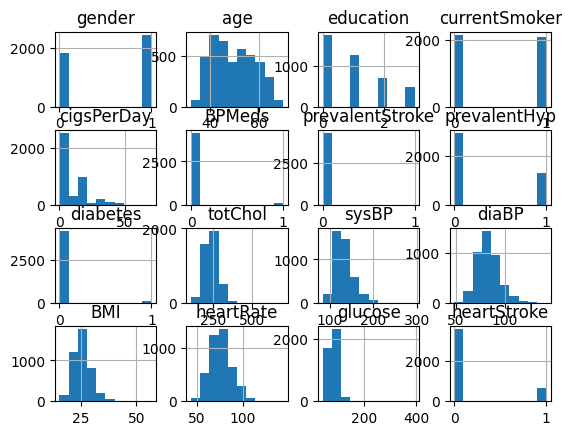

In [80]:
plt.figure(figsize=(12,6))
print(df.groupby('heartRate').size())
df.hist() 

## 3. Build and Train The Model

In [81]:
X = df.iloc[:, :-1].values ## semua value kecuali heartStroke
y = df.iloc[:, -1].values ## heartStroke only
Le = LabelEncoder()

y = Le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Menggunakan algoritma random forest
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

## 4. Evaluate Model Performance

In [86]:
# Memprediksi R^2
y_pred = model.predict(X_test)
akurasi = model.score(X_test, y_test)
print('R^2: {}'.format(akurasi))

# Tuning akurasi model
model_tuned = RandomForestClassifier(n_estimators=200, random_state=0)
model_tuned.fit(X_train, y_train)
y_pred_tuned = model_tuned.predict(X_test)
akurasi_tuned = model_tuned.score(X_test, y_test)
print('R^2 tunned: {}'.format(akurasi_tuned))

# Cek
print(y_pred)
print(y_test)


R^2: 0.8380503144654088
R^2 tunned: 0.8482704402515723
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
